In [1]:
%cd ~/protein-transfer

/home/francesca/protein-transfer


In [2]:
%load_ext blackcellmagic
%load_ext autoreload
%autoreload 2

In [240]:
from __future__ import annotations

import ast

import numpy as np
import pandas as pd

from scr.params.emb import MODEL_SIZE, MODEL_LAYER, EMB_MODEL_SIZE
from scr.params.vis import ORDERED_TASK_LIST, TASK_LEGEND_MAP

In [4]:
# try to see how norm the best and now do all last layer analysis

In [198]:
result_df_path = "results/summary/all_results.csv"

result_df = pd.read_csv(result_df_path)

# check column name existance
for c in ["metric", "ablation", "arch", "value", "task", "model", "ptp"]:
    assert c in result_df.columns, f"{c} not in df from {result_df_path}"

# Convert the string of lists to NumPy arrays
result_df["value"] = result_df["value"].apply(ast.literal_eval).apply(np.array)

# make ptp float
result_df["ptp"] = result_df["ptp"].astype(float)

result_df

,arch,task,model,ablation,ptp,metric,value
0,carp,proeng_aav_one_vs_many_mean,carp_640M,emb,1.0,train_loss,"[9.59526940116963, 6.894266263718891, 6.377686..."
1,carp,proeng_aav_one_vs_many_mean,carp_640M,emb,1.0,val_loss,"[11.18654191999164, 8.622644328345816, 8.33617..."
2,carp,proeng_aav_one_vs_many_mean,carp_640M,emb,1.0,test_loss,"[13.582533778622887, 53.712009437112215, 74.04..."
3,carp,proeng_aav_one_vs_many_mean,carp_640M,emb,1.0,test_performance_1,"[0.9704321391244177, 0.9629028051372428, 0.962..."
4,carp,proeng_aav_one_vs_many_mean,carp_640M,emb,1.0,test_performance_2,"[0.19544242309285326, 0.3282696048440418, 0.31..."
...,...,...,...,...,...,...,...
1743,esm,annotation_scl_balanced,onehot,onehot,0.0,train_loss,[0.3524752729817441]
1744,esm,annotation_scl_balanced,onehot,onehot,0.0,val_loss,[1.373852210385459]
1745,esm,annotation_scl_balanced,onehot,onehot,0.0,test_loss,[2.0159953236579895]
1746,esm,annotation_scl_balanced,onehot,onehot,0.0,test_performance_2,[0.37402597402597404]


In [199]:
prepped_df = result_df.copy()

# add task type and model size details for plotting legends
prepped_df["task_type"] = prepped_df["task"].str.split("_").str[0]
prepped_df["model_size"] = prepped_df["model"].map(MODEL_SIZE)
prepped_df["model_layer"] = prepped_df["model"].map(MODEL_LAYER)

# get rid of pooling details
prepped_df["task"] = prepped_df["task"].str.replace("_mean", "")
prepped_df["task"] = prepped_df["task"].str.replace("_noflatten", "")

# sort based on given task order for plot legend
prepped_df["task"] = pd.Categorical(
    prepped_df["task"], categories=ORDERED_TASK_LIST, ordered=True
).map(TASK_LEGEND_MAP)
prepped_df = prepped_df.sort_values(["task", "ptp"], ascending=[True, False])

prepped_df

,arch,task,model,ablation,ptp,metric,value,task_type,model_size,model_layer
80,carp,GB1 - sampled,carp_640M,emb,1.0,train_loss,"[2.5043217133381526, 1.8768573377906583, 1.809...",proeng,640.0,56
81,carp,GB1 - sampled,carp_640M,emb,1.0,val_loss,"[2.4487856676276403, 1.889322691593076, 1.8535...",proeng,640.0,56
82,carp,GB1 - sampled,carp_640M,emb,1.0,test_loss,"[2.5326230877883487, 1.9205839668776579, 1.879...",proeng,640.0,56
83,carp,GB1 - sampled,carp_640M,emb,1.0,test_performance_1,"[0.8536247926960799, 0.9469106827092577, 0.949...",proeng,640.0,56
84,carp,GB1 - sampled,carp_640M,emb,1.0,test_performance_2,"[0.433213705534327, 0.8222689931610957, 0.8221...",proeng,640.0,56
...,...,...,...,...,...,...,...,...,...,...
1691,esm,NaN,esm1_t6_43M_UR50S,stat,0.0,val_loss,"[0.9926145014009977, 0.9802829968301874, 0.972...",structure,43.0,6
1701,esm,NaN,esm1b_t33_650M_UR50S,stat,0.0,train_loss,"[0.9954574287754215, 0.976576955351111, 0.9950...",structure,650.0,33
1702,esm,NaN,esm1b_t33_650M_UR50S,stat,0.0,val_loss,"[0.9926900832276595, 0.9727039494012532, 0.995...",structure,650.0,33
1732,esm,NaN,onehot,onehot,0.0,train_loss,[1.0096537658613023],structure,NaN,1


In [200]:

# Count the number of rows with NaN values to make sure just structure_ss3_tape_processed - should be 76
prepped_df.isna().any(axis=1).sum()

164

In [201]:
# get last layer for each arch 
# then plot x as model size and y as performance 
# two kinds of lines for esm and carp

In [202]:
def get_bestorlast_metric_df(
    df: pd.DataFrame,
    metric: str = "test_performance_1",
    arch: str = "",
    bestorlast: str = "best",
) -> pd.DataFrame:

    """
    A function for cleaning up the df to get best layer based on chosen metric
    """

    slice_df = df[(df["metric"] == metric)].copy()

    slice_df = slice_df[
        (slice_df["ablation"] == "onehot") | (slice_df["ablation"] == "emb")
    ]

    # comb carp and esm
    if arch != "":
        slice_df = slice_df[(slice_df["arch"] == arch)].copy()

    if bestorlast == "best":

        if metric == "test_loss":
            # get the max perform layer
            slice_df["best_value"] = slice_df["value"].apply(np.min)
            slice_df["best_layer"] = slice_df["value"].apply(np.argmin)

            # Find the index of the maximum value in 'value_column' for each group
            min_indices = (
                slice_df.groupby(["task", "ablation"])["best_value"].idxmin().dropna()
            )

            # Use loc to select the rows corresponding to the max indices
            slice_df = slice_df.loc[min_indices]

        else:
            # get the max perform layer
            slice_df["best_value"] = slice_df["value"].apply(np.max)
            slice_df["best_layer"] = slice_df["value"].apply(np.argmax)

            # Find the index of the maximum value in 'value_column' for each group
            max_indices = (
                slice_df.groupby(["task", "ablation"])["best_value"].idxmax().dropna()
            )

            # Use loc to select the rows corresponding to the max indices
            slice_df = slice_df.loc[max_indices]

    elif bestorlast == "last":

        # get last layer
        slice_df["last_value"] = slice_df["value"].apply(
            lambda x: x[-1] if len(x) > 0 else None
        )

    else:
        print(f"{bestorlast} is not 'best' or 'last'")

    return slice_df.copy()

In [203]:
metric = "test_performance_1"
df = get_bestorlast_metric_df(df=prepped_df, metric=metric, arch="", bestorlast="last")
carp_df = get_bestorlast_metric_df(df=prepped_df, metric=metric, arch="carp", bestorlast="last")
esm_df = get_bestorlast_metric_df(df=prepped_df, metric=metric, arch="esm", bestorlast="last")
df

,arch,task,model,ablation,ptp,metric,value,task_type,model_size,model_layer,last_value
83,carp,GB1 - sampled,carp_640M,emb,1.000,test_performance_1,"[0.8536247926960799, 0.9469106827092577, 0.949...",proeng,640.0,56,0.973782
88,carp,GB1 - sampled,carp_76M,emb,1.000,test_performance_1,"[0.8559977204197046, 0.9466847539894716, 0.952...",proeng,76.0,32,0.968988
93,carp,GB1 - sampled,carp_600k,emb,1.000,test_performance_1,"[0.8685589484637927, 0.9384991818538692, 0.923...",proeng,0.6,16,0.944384
98,carp,GB1 - sampled,carp_38M,emb,1.000,test_performance_1,"[0.8563895876302393, 0.9469366069402461, 0.951...",proeng,38.0,16,0.968653
1213,esm,GB1 - sampled,esm1_t34_670M_UR50S,emb,1.000,test_performance_1,"[0.8694812739489748, 0.9495267864557306, 0.954...",proeng,670.0,34,0.977456
...,...,...,...,...,...,...,...,...,...,...,...
1127,carp,SS3 - TS115,carp_640M,emb,0.125,test_performance_1,"[0.5844522704818851, 0.778079079985574, 0.8393...",structure,640.0,56,0.935163
1138,carp,SS3 - TS115,carp_38M,emb,0.125,test_performance_1,"[0.588101730355305, 0.7796711365702024, 0.8427...",structure,38.0,16,0.912127
1149,carp,SS3 - TS115,carp_600k,emb,0.125,test_performance_1,"[0.5888074295283633, 0.7537395667214081, 0.806...",structure,0.6,16,0.882111
957,carp,SS3 - TS115,onehot,onehot,0.000,test_performance_1,[0.6419719552524553],structure,NaN,1,0.641972


In [204]:
# ignore ptp not 1 or 0
# Select rows where 'Column2' has a value from the list
df = df[df["ptp"].isin([0, 1])]
df

,arch,task,model,ablation,ptp,metric,value,task_type,model_size,model_layer,last_value
83,carp,GB1 - sampled,carp_640M,emb,1.0,test_performance_1,"[0.8536247926960799, 0.9469106827092577, 0.949...",proeng,640.0,56,0.973782
88,carp,GB1 - sampled,carp_76M,emb,1.0,test_performance_1,"[0.8559977204197046, 0.9466847539894716, 0.952...",proeng,76.0,32,0.968988
93,carp,GB1 - sampled,carp_600k,emb,1.0,test_performance_1,"[0.8685589484637927, 0.9384991818538692, 0.923...",proeng,0.6,16,0.944384
98,carp,GB1 - sampled,carp_38M,emb,1.0,test_performance_1,"[0.8563895876302393, 0.9469366069402461, 0.951...",proeng,38.0,16,0.968653
1213,esm,GB1 - sampled,esm1_t34_670M_UR50S,emb,1.0,test_performance_1,"[0.8694812739489748, 0.9495267864557306, 0.954...",proeng,670.0,34,0.977456
...,...,...,...,...,...,...,...,...,...,...,...
1561,esm,SS3 - TS115,esm1_t12_85M_UR50S,emb,1.0,test_performance_1,"[0.6529900603577361, 0.7738807544644085, 0.853...",structure,85.0,12,0.917551
1572,esm,SS3 - TS115,esm1_t6_43M_UR50S,emb,1.0,test_performance_1,"[0.65285956029744, 0.8106085836904526, 0.86196...",structure,43.0,6,0.903076
1583,esm,SS3 - TS115,esm1b_t33_650M_UR50S,emb,1.0,test_performance_1,"[0.6533086492178679, 0.8183053778618697, 0.868...",structure,650.0,33,0.936246
957,carp,SS3 - TS115,onehot,onehot,0.0,test_performance_1,[0.6419719552524553],structure,NaN,1,0.641972


In [205]:
import os
import math
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from scr.params.vis import (
    ORDERED_TASK_LIST,
    TASK_LEGEND_MAP,
    TASK_COLORS,
    TASK_SIMPLE_COLOR_MAP,
    PLOT_EXTS,
)
from scr.params.emb import ARCH_TYPE
from scr.vis.vis_utils import BokehSave, save_plt
from scr.utils import checkNgen_folder

In [206]:
def simplify_test_metric(metric: str) -> str:

    """
    A function to unify metric for plotting
    """

    for t in ["test_performance_1", "test_performance_2", "test_loss"]:
        metric = metric.replace(t, "test performance")

    return metric

In [207]:
ARCH_DOT_STYLE_DICT = {"esm": {"edgecolors": "none", "alpha": 0.8}, 
                    "carp": {"facecolors": "none"}}

In [208]:
# make df no ptp dets already
def plot_emb_onehot_det(
    df: pd.DataFrame,
    metric: str,
    path2folder: str = "results/summary/last/embonehot",
):

    """
    A function for plotting emb with different size and arch vs onehot
    """

    plot_title = "Best {} embedding against onehot baseline".format(
        simplify_test_metric(metric)
    )

    print(f"Plotting {plot_title}...")

    fig, ax = plt.subplots()
    fig.set_size_inches(6, 6)

    if "best_value" in df.columns:
        val_col = "best_value"
    elif "last_value" in df.columns:
        val_col = "last_value"

    # get the min x or y for the diagnol line
    diag_min = 1

    for arch in ARCH_TYPE:

        for (task, c) in TASK_SIMPLE_COLOR_MAP.items():

            sliced_df = df[(df["task"] == task) & (df["arch"] == arch)]

            onehot_df = sliced_df[sliced_df["ablation"] == "onehot"]
            emb_df = sliced_df[sliced_df["ablation"] == "emb"]

            x = onehot_df[val_col].values
            y = emb_df[val_col].values
            # x will be onehot for esm or carp for the given task
            # and y will be all different arch
            x = np.repeat(x, len(y))

            if metric != "test_loss":
                min_xy = min(min(y), min(x))
                if min_xy < diag_min:
                    diag_min = min_xy

            s = np.log(emb_df["model_size"].values + 1) * 18

            arch_dict = ARCH_DOT_STYLE_DICT[arch]

            if arch == "esm":
                arch_dict["c"] = c
                arch_dict["label"] = task
            elif arch == "carp":
                arch_dict["edgecolor"] = c

            scatter = ax.scatter(x, y, s=s, **arch_dict)

    if metric != "test_loss":
        # diag min to smallest one decimal
        diag_min = math.floor(diag_min * 10) / 10

        # Add a diagonal line
        plt.plot(
            [diag_min, 1],
            [diag_min, 1],
            linestyle=":",
            color="grey",
        )

    ax.add_artist(ax.legend(title="Tasks", bbox_to_anchor=(1, 1.012), loc="upper left"))

    # add legend for arch size
    arch_size_scatter = [None] * (len(MODEL_SIZE) - 1)

    for i, (model, size) in enumerate(
        {
            model: size for model, size in MODEL_SIZE.items() if model not in ["onehot"]
        }.items()
    ):
        
        if "carp" in model:
            mfc = "none"
        else:
            mfc = "gray"

        arch_size_scatter[i] = Line2D(
            [0],
            [0],
            marker="o",
            color="w",
            label=f"{model}: {size} M",
            markersize=np.log(size + 1) + 2.75,
            markerfacecolor="gray",
            markeredgecolor="gray",
            mfc=mfc,
        )

    ax.add_artist(
        ax.legend(
            handles=list(arch_size_scatter),
            bbox_to_anchor=(1, 0.49),
            loc="upper left",
            title="Pretrained architecture sizes",
        )
    )

    if metric == "test_loss":
        plt.xscale("log")
        plt.yscale("log")

    plt.ylabel("Best embedding test performance")
    plt.xlabel("Onehot")
    plt.title(plot_title)

    path2folder = checkNgen_folder(os.path.normpath(path2folder))

    print(f"Saving to {path2folder}...")

    for ext in PLOT_EXTS:
        plot_title_no_space = plot_title.replace(" ", "_")
        plt.savefig(
            os.path.join(path2folder, f"{plot_title_no_space}{ext}"),
            bbox_inches="tight",
        )

    return fig

Plotting Best test performance embedding against onehot baseline...


IndexError: list assignment index out of range

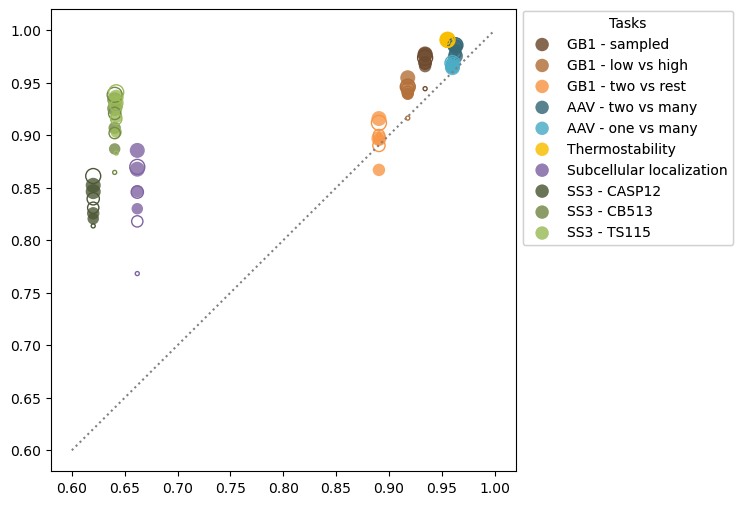

In [209]:
plot_emb_onehot_det(
    df,
    metric="test_performance_1",
    path2folder = "results/summary/last/embonehot");

Plotting Best test performance embedding against onehot baseline...


IndexError: list assignment index out of range

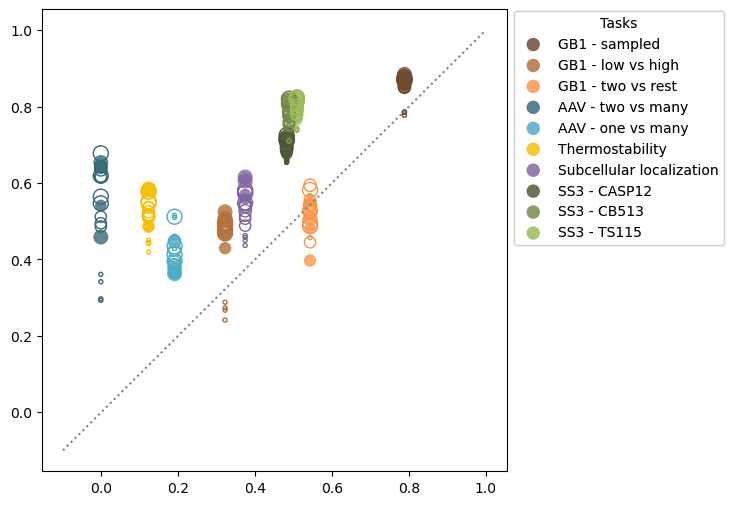

In [210]:
plot_emb_onehot_det(
    get_bestorlast_metric_df(df=prepped_df, metric="test_performance_2", arch="", bestorlast="last"),
    metric="test_performance_2",
    path2folder = "results/summary/last/embonehot");

In [211]:
df = get_bestorlast_metric_df(
    df=prepped_df, metric="test_performance_2", arch="", bestorlast="last"
)
df = df[df["ptp"].isin([0, 1])][["arch", "task", "model", "ablation", "model_size", "last_value"]]
emb_df = df[df["ablation"] == "emb"].reset_index(drop=True)
# Convert 'Column1' to categorical with custom order
emb_df["model"] = pd.Categorical(emb_df["model"], categories=list(MODEL_SIZE.keys()), ordered=True)

# Sort the DataFrame based on the custom order in 'Column1'
emb_df = emb_df.sort_values(by=["task", "model"])


onehot_df = df[df["ablation"] == "onehot"].reset_index(drop=True)
# onehot should be same for either arch
onehot_df = onehot_df.drop('arch', axis=1)

# Drop duplicate rows based on all columns
onehot_df = onehot_df.drop_duplicates().reset_index(drop=True)

emb_df, onehot_df

(    arch           task                 model ablation  model_size  last_value
 7    esm  GB1 - sampled     esm1_t6_43M_UR50S      emb        43.0    0.852435
 6    esm  GB1 - sampled    esm1_t12_85M_UR50S      emb        85.0    0.857460
 4    esm  GB1 - sampled   esm1_t34_670M_UR50S      emb       670.0    0.865990
 5    esm  GB1 - sampled  esm1b_t33_650M_UR50S      emb       650.0    0.884644
 2   carp  GB1 - sampled             carp_600k      emb         0.6    0.785568
 ..   ...            ...                   ...      ...         ...         ...
 79   esm    SS3 - TS115  esm1b_t33_650M_UR50S      emb       650.0    0.821539
 75  carp    SS3 - TS115             carp_600k      emb         0.6    0.739395
 74  carp    SS3 - TS115              carp_38M      emb        38.0    0.779659
 72  carp    SS3 - TS115              carp_76M      emb        76.0    0.802989
 73  carp    SS3 - TS115             carp_640M      emb       640.0    0.824030
 
 [80 rows x 6 columns],
              

In [212]:
emb_df.task.nunique(), emb_df.model.nunique()

(10, 8)

In [213]:
emb_df.columns

Index(['arch', 'task', 'model', 'ablation', 'model_size', 'last_value'], dtype='object')

In [214]:
from scr.params.emb import MODEL_SIZE

In [215]:
MODEL_SIZE

{'esm1_t6_43M_UR50S': 43,
 'esm1_t12_85M_UR50S': 85,
 'esm1_t34_670M_UR50S': 670,
 'esm1b_t33_650M_UR50S': 650,
 'carp_600k': 0.6,
 'carp_38M': 38,
 'carp_76M': 76,
 'carp_640M': 640}

In [216]:
MODEL_SIZE.keys()

dict_keys(['esm1_t6_43M_UR50S', 'esm1_t12_85M_UR50S', 'esm1_t34_670M_UR50S', 'esm1b_t33_650M_UR50S', 'carp_600k', 'carp_38M', 'carp_76M', 'carp_640M'])

In [217]:
def normalize_dict(
    input_dict: dict = MODEL_SIZE, key_to_remove: str = "onehot", res: float = 0.1
) -> dict:
    """
    A function to noramlize dict with residual
    for getting more reasonable alpha values as the default
    """
    # remove the specified key
    if key_to_remove in input_dict:
        input_dict.pop(key_to_remove)

    # Step 2: Normalize the values to be in the range [0, 1]
    values = list(input_dict.values())
    min_val = min(values)
    max_val = max(values)

    if max_val != min_val:
        input_dict = {
            key: (value - min_val) / (max_val - min_val) * (1 - res) + res
            for key, value in input_dict.items()
        }

    return input_dict

In [218]:
normalize_dict(input_dict = MODEL_SIZE, key_to_remove = "onehot", res = 0.7)

{'esm1_t6_43M_UR50S': 0.7190020914251568,
 'esm1_t12_85M_UR50S': 0.7378249178368688,
 'esm1_t34_670M_UR50S': 1.0,
 'esm1b_t33_650M_UR50S': 0.9910367493277562,
 'carp_600k': 0.7,
 'carp_38M': 0.7167612787570958,
 'carp_76M': 0.733791455034359,
 'carp_640M': 0.9865551239916344}

In [239]:
MODEL_SIZE

{'esm1_t6_43M_UR50S': 43,
 'esm1_t12_85M_UR50S': 85,
 'esm1_t34_670M_UR50S': 670,
 'esm1b_t33_650M_UR50S': 650,
 'carp_600k': 0.6,
 'carp_38M': 38,
 'carp_76M': 76,
 'carp_640M': 640}

In [243]:
import math
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

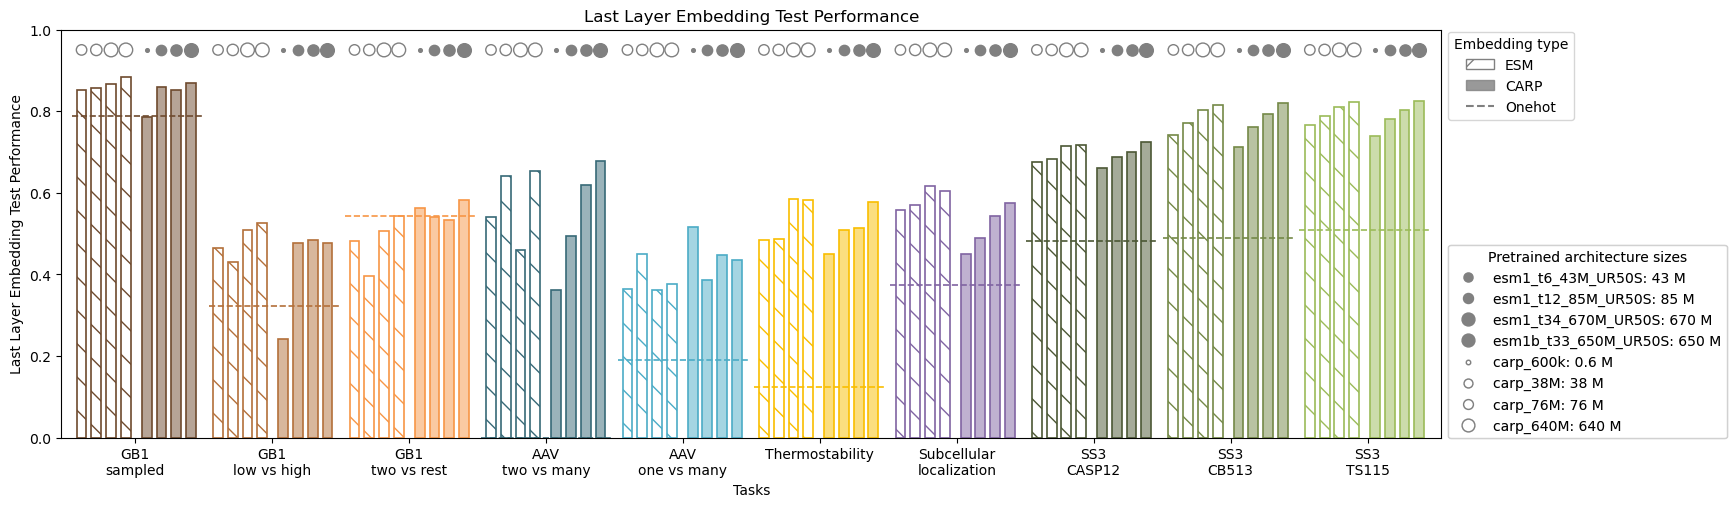

In [251]:
# Create a three-degree nested multiclass bar plot
fig, ax = plt.subplots()
fig.set_size_inches(24, 6)

# plot horizontal lines for onehot baselines
for i, t in enumerate(TASK_SIMPLE_COLOR_MAP.keys()):

    baseline_value = onehot_df[onehot_df["task"] == t][
        "last_value"
    ].max()  # Adjust as needed
    ax.axhline(
        y=baseline_value,
        linestyle="--",
        color=TASK_SIMPLE_COLOR_MAP[t],
        xmin=0.008 + i * 0.09875,
        xmax=i * 0.09875 + 0.103,
        linewidth=1.2,
    )


# Plotting the bars with different levels of customization
for i, (t, st, sst, ms, val) in enumerate(
    zip(
        emb_df["task"],
        emb_df["arch"],
        emb_df["model"],
        emb_df["model_size"],
        emb_df["last_value"],
    )
):

    x = (
        1.2 * i + 1 + math.ceil((i + 1) / 4) * 0.5 + math.ceil((i + 1) / 8) * 0.5
    )  # x-position for each bar

    if st == "esm":
        bar_style = {
            "color": "none",
            "edgecolor": TASK_SIMPLE_COLOR_MAP[t],
            "hatch": "\\",
        }
        color = "none"
    else:
        bar_style = {
            "color": TASK_SIMPLE_COLOR_MAP[t] + "80",
            "edgecolor": TASK_SIMPLE_COLOR_MAP[t],
        }
        color = "gray"

    # Plot the bars with different shading and alpha values
    bar = ax.bar(x, val, linewidth=1.2, **bar_style)

    # Overlay scatter plot indicating another parameter
    scatter = ax.scatter(
        x, 0.95, s=np.log(ms + 1) * 15, edgecolor="gray", marker="o", color=color
    )

# Create legends for each color group
"""legend_handles = []
for t, color in TASK_SIMPLE_COLOR_MAP.items():
    legend_handles.append(Patch(facecolor=color, edgecolor=color, label=t))

# Create a legend for each color group
ax.legend(handles=legend_handles,bbox_to_anchor=(1, 1.012), loc="upper left", title="Tasks")
"""


# Manually create legend elements
legend_elements = [
    Rectangle((0, 0), 1, 1, facecolor="none", hatch='/', edgecolor="gray", label="ESM"),
    Rectangle((0, 0), 1, 1, facecolor="gray", edgecolor="gray", alpha=0.8, label="CARP"),
    Line2D([0], [0], linestyle="--", color="gray", label="Onehot"),
]

# Create legend
ax.add_artist(
    ax.legend(
        handles=legend_elements,
        bbox_to_anchor=(1, 1.012),
        loc="upper left",
        title="Embedding type",
    )
)

# add legend for arch size
arch_size_scatter = [None] * (len(EMB_MODEL_SIZE))

for i, (model, size) in enumerate(EMB_MODEL_SIZE.items()):

    if "carp" in model:
        mfc = "none"
    else:
        mfc = "gray"

    arch_size_scatter[i] = Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label=f"{model}: {size} M",
        markersize=np.log(size + 1) + 2.75,
        markerfacecolor="gray",
        markeredgecolor="gray",
        mfc=mfc,
    )

ax.add_artist(
    ax.legend(
        handles=list(arch_size_scatter),
        bbox_to_anchor=(1, 0.49),
        loc="upper left",
        title="Pretrained architecture sizes",
    )
)

# Set x and y value ranges
ax.set_xlim(0.36, 112.6)  # Adjust the range based on your data
ax.set_ylim(0, 1)  # Adjust the range based on your data

# Set x-axis ticks and align them to the middle of the corresponding labels
ax.set_xticks(np.linspace(0.36 + 6, 112.6 - 6, 10))
ax.set_xticklabels(
    [
        k.replace(" - ", "\n").replace("r l", "r\nl")
        for k in TASK_SIMPLE_COLOR_MAP.keys()
    ],
    ha="center",
)

# Set labels and title
ax.set_xlabel("Tasks")
ax.set_ylabel("Last Layer Embedding Test Performance")
ax.set_title("Last Layer Embedding Test Performance")

# Adjust layout for better visibility of legends
plt.subplots_adjust(right=0.7, bottom=0.2)

# Show the plot
plt.show()